# Análisis exploratorio de datos

Una vez completada la fase de adquisición de datos, como paso previo a la etapa de preprocesamiento y limpieza, se ha llevado a cabo un pequeño análisis exploratorio de los datos en crudo exportados por el sistema de captura. Para ello, se han utilizado estadísticas descriptivas y técnicas de visualización que permiten comprender mejor los datos con los que se va a trabajar. 

## Setup

In [1]:
# Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

import os

# Librerías para análisis de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def save_fig(fig_id, out_dir, tight_layout=True, fig_extension="png", resolution=1200):
    path = os.path.join(out_dir, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#http://aeturrell.com/2018/01/31/publication-quality-plots-in-python/

In [3]:
subject = "subject_01"
record = "rec_01"
dataset_path = 'D:\OneDrive - UNED\Master-Compartido\PROTOCOLO_RECOGIDA\dataset\optitrack'

## Características demográficas y medidas antropométricas

### Carga de datos

Este primer estudio inicial se ha centrado en las características demográficas (`demographics.xlsx`) y medidas antropométricas (`anthropometry.xlsx`) de los participantes, ya que las variables específicas para analizar la marcha humana han sido estimadas y calculadas mediante un proceso de ingeniería de características en una fase de trabajo posterior.

En el archivo `demographics.xlsx` se almacena información general sobre los participantes (edad y género). Contiene las siguientes tres columnas:

* `subject`: Identificador único del participante. Es una cadena de texto de la forma *subject_num*.

* `gender`: Género del participante: masculino (M) o femenino (F).

* `age`: Edad, en años, del sujeto.


In [4]:
demographics = pd.read_excel(dataset_path + "/demographics.xlsx")
demographics

,subject,gender,age
0,subject_01,M,22
1,subject_02,M,38
2,subject_03,M,28
3,subject_04,M,22
4,subject_05,M,66
5,subject_06,M,25
6,subject_07,M,24
7,subject_08,F,30
8,subject_09,F,23
9,subject_10,F,20


Por su parte, la tabla `anthropometry.xlsx` registra las medidas antropométricas tomadas para cada sujeto, dando lugar a las siguientes 8 columnas:

* `subject`: Identificador único del participante. Es una cadena de texto de la forma *subject_num*.

* `height`: Estatura del sujeto, medida en centímetros.

* `weight`: Peso, en kilogramos. 

* `knee_width`: Anchura de rodilla, medida en milímetros. 

* `knee_height`: Altura de rodilla, medida en milímetros. 

* `ankle_width`: Anchura de tobillo, medida en milímetros. 

* `ankle_height`: Altura de tobillo, medida en milímetros. 

* `leg_length`: Longitud de pierna, medida en milímetros. 

* `foot_length`: Longitud de pie, medida en milímetros. 

In [5]:
anthropometry = pd.read_excel(dataset_path + "/anthropometry.xlsx", skipfooter = 1)
anthropometry

,subject,height,weight,knee_width,knee_height,ankle_width,ankle_height,leg_length,foot_length
0,subject_01,169,70,110,520,70,103,965,260
1,subject_02,171,66,110,560,75,100,1100,260
2,subject_03,165,100,140,530,85,125,940,275
3,subject_04,175,62,100,540,75,110,1030,250
4,subject_05,176,104,100,580,70,150,1010,270
5,subject_06,177,78,110,570,70,130,975,262
6,subject_07,184,100,123,590,80,130,1160,330
7,subject_08,158,68,145,500,100,120,965,250
8,subject_09,172,82,130,500,80,110,980,260
9,subject_10,167,57,120,490,75,90,970,240


### Estudio estadístico

Para obtener una descripción rápida de los datos, vamos a utilizar el método ***describe()*** de Pandas. Se observa que el dataset ha sido construido a partir de los
movimientos capturados para 10 sujetos (7 hombres y 3 mujeres), con una media de edad de
29.8 $\pm$ 13.75 años. Además, en la tabla se proporcionan una serie de
estadísticas descriptivas para la edad y cada variable antropométrica, incluyendo media,
mediana, máximo, mínimo, desviación estándar (std) y percentiles 25 y 75. En este sentido,
conviene señalar que la estatura está representada en centímetros, el peso en kilogramos, y
el resto de las medidas corporales en milímetros.

In [6]:
data = pd.merge(demographics, anthropometry, on="subject")
data

,subject,gender,age,height,weight,knee_width,knee_height,ankle_width,ankle_height,leg_length,foot_length
0,subject_01,M,22,169,70,110,520,70,103,965,260
1,subject_02,M,38,171,66,110,560,75,100,1100,260
2,subject_03,M,28,165,100,140,530,85,125,940,275
3,subject_04,M,22,175,62,100,540,75,110,1030,250
4,subject_05,M,66,176,104,100,580,70,150,1010,270
5,subject_06,M,25,177,78,110,570,70,130,975,262
6,subject_07,M,24,184,100,123,590,80,130,1160,330
7,subject_08,F,30,158,68,145,500,100,120,965,250
8,subject_09,F,23,172,82,130,500,80,110,980,260
9,subject_10,F,20,167,57,120,490,75,90,970,240


In [7]:
data = data.rename(columns={'gender': 'género', 'height': 'estatura ', 'weight':'peso',
                           'knee_width':'anchura de rodilla', 'knee_height':'altura de rodilla', 
                            'ankle_width':'anchura de tobillo', 'ankle_height':'altura de tobillo', 
                            'leg_length':'longitud de pierna', 'foot_length':'longitud de pie',
                           })

In [8]:
demographics.describe()

,age
count,10.000000
mean,29.800000
std,13.750152
min,20.000000
25%,22.250000
50%,24.500000
75%,29.500000
max,66.000000


In [9]:
anthropometry.describe()

,height,weight,knee_width,knee_height,ankle_width,ankle_height,leg_length,foot_length
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,171.400000,78.700000,118.80000,538.000000,78.000000,116.800000,1009.500000,265.700000
std,7.229569,17.192052,15.70421,35.839147,9.189366,17.674841,69.659888,24.729874
min,158.000000,57.000000,100.00000,490.000000,70.000000,90.000000,940.000000,240.000000
25%,167.500000,66.500000,110.00000,505.000000,71.250000,104.750000,966.250000,252.500000
50%,171.500000,74.000000,115.00000,535.000000,75.000000,115.000000,977.500000,260.000000
75%,175.750000,95.500000,128.25000,567.500000,80.000000,128.750000,1025.000000,268.000000
max,184.000000,104.000000,145.00000,590.000000,100.000000,150.000000,1160.000000,330.000000


Por otro lado, una manera útil para explorar visualmente la relación entre cada par de
variables numéricas consiste en trazar un histograma para cada atributo. El siguiente fragmento de código genera
 64 pequeños gráficos, resultado de emparejar dos a dos las variables antropométricas
que han sido recogidas. En la diagonal se presentan una serie de histogramas que muestran
la distribución de los valores de cada variable, y en cada gráfico se muestran los puntos
diferenciados según el género.

Saving figure eda_1


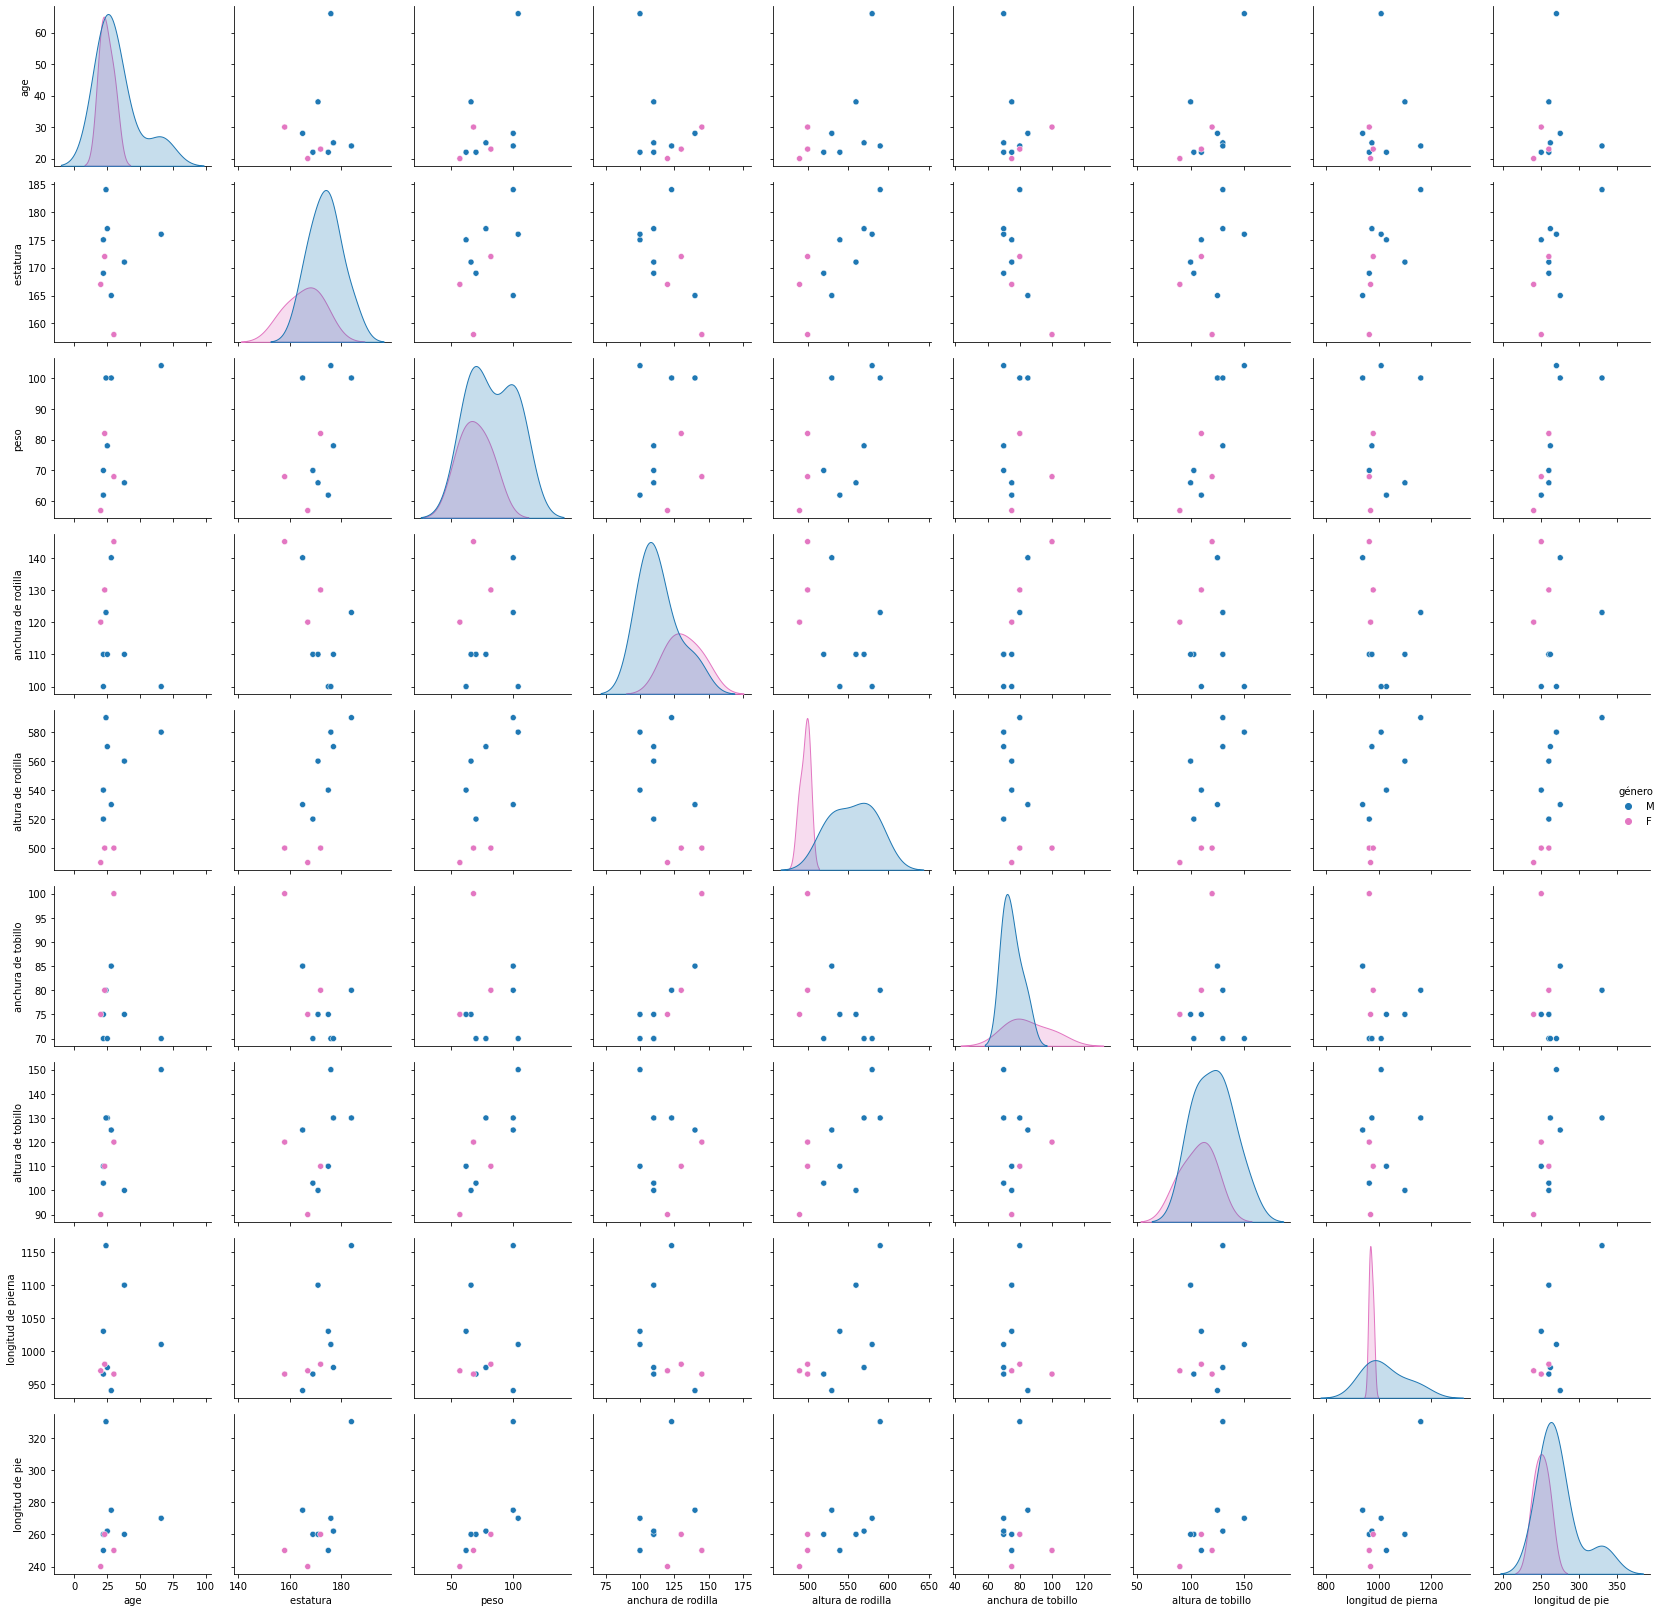

In [10]:
chart = sns.pairplot(data, hue="género", palette = ['#1F78B4', '#E377C2'],)
save_fig("eda_1", "./", tight_layout=True, fig_extension="pdf")

En estas gráficas se puede analizar cómo afecta cada variable a las demás. Por ejemplo, el
gráfico de la cuarta fila y primera columna sugiere que existe una relación lineal entre la altura
de rodilla y la estatura; mientras que en el gráfico de la penúltima fila y última columna parece
que la longitud de pierna y pie están relacionadas . Sin embargo, en este contexto de análisis
de marcha no es tan relevante la relación entre pares de características antropométricas,
sino la influencia que estas variables tienen sobre los parámetros espaciotemporales de la
marcha.

## Trayectoria de marcadores

Para conocer y comprender mejor los datos adquiridos por el sistema óptico de captura
de movimiento, durante este primer análisis exploratorio de los datos también resulta interesante inspeccionar alguno de los ficheros con las trayectorias de los marcadores. En
particular, el análisis se ha centrado en el formato TXT exportado desde Clinical 3DMA.

Estos archivos de datos incluyen las coordenadas espaciales de
dichos marcadores para cada trama de la grabación. Más concretamente, se trata de datos
tabulares formados por dos columnas de índice (número de frame y marca de tiempo) más
nueve columnas por cada marcador, correspondientes a la posición, velocidad y aceleración
de cada punto en los tres ejes. En este sentido, puesto que la captura de datos se ha realizado a una frecuencia de
100Hz y se han utilizado 22 marcadores, estos archivos de trayectorias contienen 3000
filas (30 segundos de grabación) y 200 columnas

### Carga de datos

Lee los marcadores utilizados (cabecera)

In [11]:
raw_file = os.path.join(dataset_path, subject, record, (subject + "_" + record + ".raw"))

with open(raw_file) as f:
    markers_line = f.readline()

markers = markers_line.split('\t')[:-1]
markers

['right_asis',
 'left_asis',
 's2',
 'right_lateral_thigh',
 'left_lateral_thigh',
 'right_knee',
 'left_knee',
 'right_calf',
 'left_calf',
 'right_ankle',
 'left_ankle',
 'right_heel',
 'left_heel',
 'right_toe',
 'left_toe',
 'right_shoulder',
 'left_shoulder',
 'right_elbow',
 'left_elbow',
 'right_wrist',
 'left_wrist',
 'neck']

In [12]:
markers_dict = {
    'right_asis': 7,
    'left_asis': 8,
    's2' : 16,
    'right_lateral_thigh' : 17,
    'left_lateral_thigh' : 18,
    'right_knee': 9,
    'left_knee': 10,
    'right_calf': 20,
    'left_calf': 19,
    'right_ankle': 11,
    'left_ankle': 12,
    'right_heel': 22,
    'left_heel': 21,
    'right_toe': 13,
    'left_toe': 14,
    'right_shoulder': 1,
    'left_shoulder': 2,
    'right_elbow': 3,
    'left_elbow': 4,
    'right_wrist': 5,
    'left_wrist': 6,
    'neck': 15, 
}

Genera nombres de columnas, teniendo en cuenta que:

Punto 1 Posición XYZ, Punto 1 Velocidad RST, Punto 1 Aceleración UVW; Punto 2 Posición XYZ, Punto 2 Vel.....

In [13]:
headers = ['frame', 'time']

for mrk in markers:
    headers.append(mrk + "_PX")
    headers.append(mrk + "_PY")
    headers.append(mrk + "_PZ")
    headers.append(mrk + "_VX")
    headers.append(mrk + "_VY")
    headers.append(mrk + "_VZ")
    headers.append(mrk + "_AX")
    headers.append(mrk + "_AY")
    headers.append(mrk + "_AZ")

Lee fichero de datos

In [14]:
raw = pd.read_csv(raw_file, sep='\t', lineterminator='\n', header=None, skiprows=[0],  
                  usecols= range(len(headers)), names=headers)
raw

,frame,time,right_asis_PX,right_asis_PY,right_asis_PZ,right_asis_VX,right_asis_VY,right_asis_VZ,right_asis_AX,right_asis_AY,...,left_wrist_AZ,neck_PX,neck_PY,neck_PZ,neck_VX,neck_VY,neck_VZ,neck_AX,neck_AY,neck_AZ
0,0,0.00,716.40,912.24,2011.29,1.24,-0.78,-10.84,-407.71,556.34,...,570.07,632.32,1378.91,2174.12,-15.41,17.19,-30.22,587.77,-812.99,-1386.72
1,1,0.01,716.42,912.23,2011.18,-2.84,4.78,-18.73,608.19,1462.20,...,-177.21,632.16,1379.08,2173.82,-9.53,9.06,-44.09,1142.07,-1327.16,-1319.17
2,2,0.02,716.35,912.34,2010.91,13.40,28.46,-70.73,938.01,709.51,...,-845.10,632.13,1379.09,2173.24,7.44,-9.36,-56.61,1613.24,-16.60,69.53
3,3,0.03,716.65,912.71,2009.94,15.33,16.67,-54.59,901.17,-1322.09,...,690.09,632.30,1378.98,2172.74,19.28,7.71,-45.77,789.99,1356.01,281.75
4,4,0.04,716.69,912.67,2009.87,34.03,9.21,-24.27,2359.14,-209.70,...,-148.76,632.48,1379.21,2172.29,21.50,8.43,-52.00,-708.87,-1271.57,192.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,29.95,-445.82,909.78,-1892.93,-346.53,-34.89,-494.39,-3884.63,520.10,...,1847.20,-466.48,1375.34,-1733.61,-168.28,-74.34,-399.03,-7276.85,1918.05,404.93
2996,2996,29.96,-449.23,909.05,-1897.60,-391.46,-49.69,-554.32,-3469.99,699.79,...,1279.48,-469.25,1374.91,-1737.82,-261.89,-27.27,-443.91,-5046.86,1579.80,-6496.43
2997,2997,29.97,-453.56,908.88,-1903.94,-405.31,-19.67,-577.53,1316.92,1731.54,...,5179.96,-471.51,1374.65,-1742.52,-259.25,-50.73,-497.48,78.45,-1953.67,-970.17
2998,2998,29.98,-457.22,908.59,-1908.99,-376.86,-20.90,-537.91,875.50,361.63,...,8982.24,-474.45,1373.94,-1747.55,-270.59,-51.23,-460.96,599.48,956.52,3925.93


In [15]:
raw.describe()

,frame,time,right_asis_PX,right_asis_PY,right_asis_PZ,right_asis_VX,right_asis_VY,right_asis_VZ,right_asis_AX,right_asis_AY,...,left_wrist_AZ,neck_PX,neck_PY,neck_PZ,neck_VX,neck_VY,neck_VZ,neck_AX,neck_AY,neck_AZ
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,14.995000,-20.848610,903.745547,111.511733,-39.314827,-0.127217,-130.967383,-13.209503,-0.14285,...,-7.863273,-25.294427,1367.382007,154.587110,-37.016793,-0.179433,-130.938587,-7.282617,-1.484490,-12.685737
std,866.169729,8.661697,486.404229,12.588934,1393.796989,308.929920,110.182482,741.347734,8399.176757,5880.13777,...,6062.633882,461.430174,11.965309,1393.980063,280.331500,86.972431,734.201441,3600.333629,2717.087878,3297.888457
min,0.000000,0.000000,-944.200000,875.730000,-2226.750000,-1826.660000,-627.020000,-1357.090000,-152171.950000,-63628.55000,...,-37938.390000,-812.170000,1341.040000,-2163.320000,-647.710000,-381.590000,-1147.950000,-36353.920000,-32080.320000,-43639.700000
25%,749.750000,7.497500,-394.122500,893.872500,-1174.230000,-279.102500,-75.302500,-797.367500,-2910.597500,-2379.02000,...,-3044.927500,-434.365000,1358.112500,-1124.985000,-248.395000,-70.650000,-819.937500,-2097.162500,-1629.792500,-1775.105000
50%,1499.500000,14.995000,15.055000,905.180000,175.310000,-54.720000,-7.725000,-338.845000,-19.780000,165.96500,...,31.220000,-25.100000,1369.305000,194.425000,-75.380000,-0.645000,-436.525000,-14.240000,-31.165000,45.570000
75%,2249.250000,22.492500,391.070000,912.850000,1482.810000,224.442500,70.570000,683.425000,2673.217500,2458.23000,...,2914.120000,402.190000,1376.495000,1486.887500,184.447500,70.605000,678.990000,2020.207500,1525.287500,1859.440000
max,2999.000000,29.990000,821.040000,932.410000,2041.900000,783.280000,562.170000,1219.540000,122983.440000,74238.75000,...,42923.620000,729.510000,1394.700000,2224.240000,714.250000,241.600000,1107.610000,23146.600000,18656.790000,23508.260000


La mejor manera de
entender la estructura y contenido de estos datos es intentando visualizar la distribución
de los marcadores en diferentes instantes de la grabación. Para ello, se ha importado uno
de estos archivos junto con el fichero de eventos correspondiente a la misma grabación, y
utilizando gráfico de dispersión (scatter) en tres dimensiones se ha representado visualmente
la distribución de los marcadores al inicio de la captura  y en dos instantes de
tiempo relevantes: en un contacto inicial del talón con el suelo (HS) y en el despegue del pie
(TO)

In [16]:
def plot_points(ax, frame):
    makers_points = {}
    for marker in markers:
        x = raw[marker + "_PX"][frame]
        y = raw[marker + "_PY"][frame]
        z = raw[marker + "_PZ"][frame]
        ax.scatter(x,z,y, c= 'red', s =  60)
        ax.text(x + 2 ,z + 2,y + 2,  '%s' % (str(markers_dict[marker])), size=20, zorder=1,  color='k') 
        makers_points[markers_dict[marker]] = (x,y,z)
    
    return makers_points

In [17]:
def connect_points(ax, makers_points):
    # Connect points
    connections = [(1,2), (1,15), (2, 15), (1,3), (2,4), (4,6), (3,5), (15, 16),
                  (16,8), (16,7), (8,7), (8, 18), (7, 17), (7,9), (8,10),
                   (17, 9), (18, 10), (9, 20), (10, 19), (19, 12), (20, 11),
                   (10, 12), (9, 11),
                  (14, 21), (14, 12), (21,12), (13,22), (13, 11), (11, 22)]  
    for join in connections:
        x = [makers_points[join[0]][0], makers_points[join[1]][0]]
        y = [makers_points[join[0]][1], makers_points[join[1]][1]]
        z = [makers_points[join[0]][2], makers_points[join[1]][2]]
        ax.plot(x,z,y, color='dimgray')

In [18]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=12)          # controls default text sizes


In [19]:
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Saving figure markers1


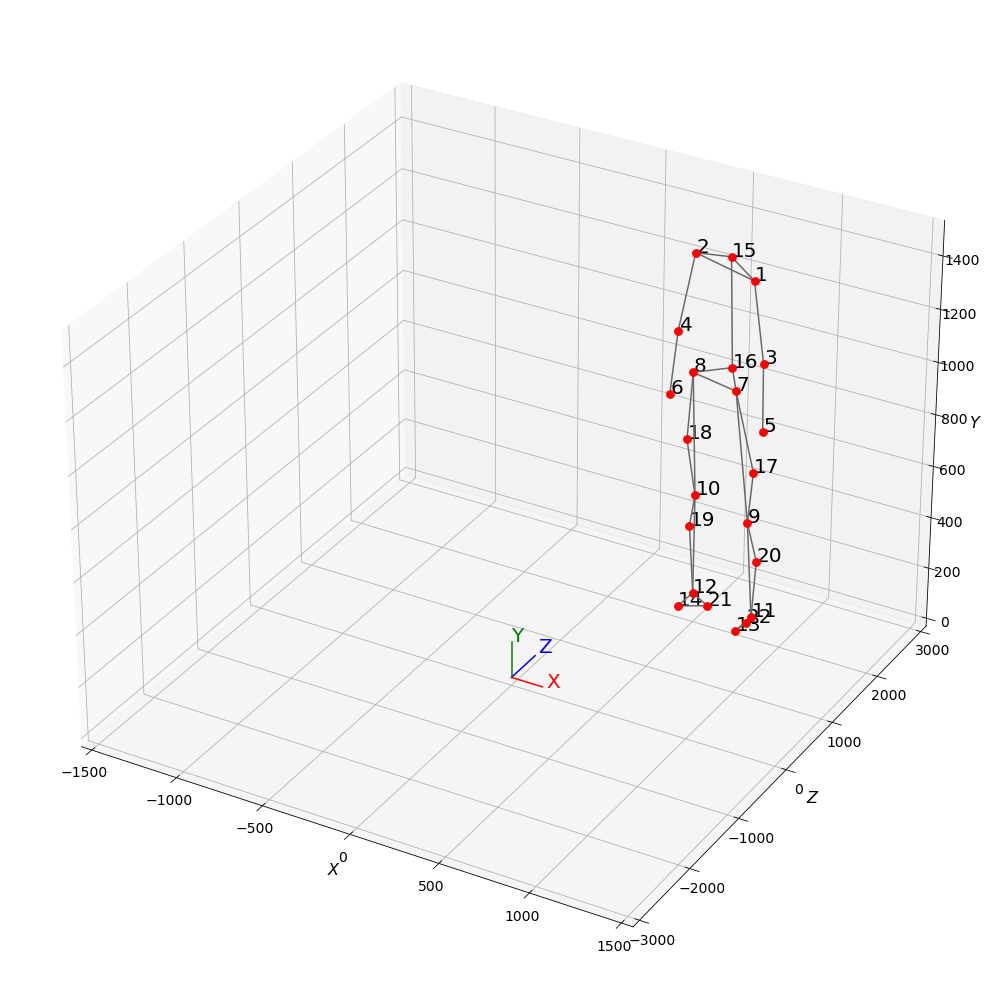

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')

ax.set_zlim3d(0, 1500) # Altura
ax.set_xlim3d(-1500, 1500)
ax.set_ylim3d(-3000, 3000)
ax.set_zlabel('$Y$', rotation = 0)
ax.set_xlabel('$X$', rotation = 0)
ax.set_ylabel('$Z$', rotation = 0)


ax.plot([0,0], [0,0] ,[0,140], color='green')
ax.text(0, 0, 140,  'Y', size=20, zorder=1,  color='green') 
ax.plot([0,0], [0,480] ,[0,0], color='blue')
ax.text(0, 550, 0,  'Z', size=20, zorder=1,  color='blue') 
ax.plot([0,180], [0,0] ,[0,0], color='red')
ax.text(200, 0, 0,  'X', size=20, zorder=1,  color='red') 

    
frame1 = 10
makers_points1 = plot_points(ax, frame1)
connect_points(ax, makers_points1)
    
#save_fig("markers1", "./", tight_layout=True, fig_extension="pdf")
plt.show()

In [21]:
# EVENT_RIGHT_FOOT_TOE_OFF 4.4

Saving figure markers2


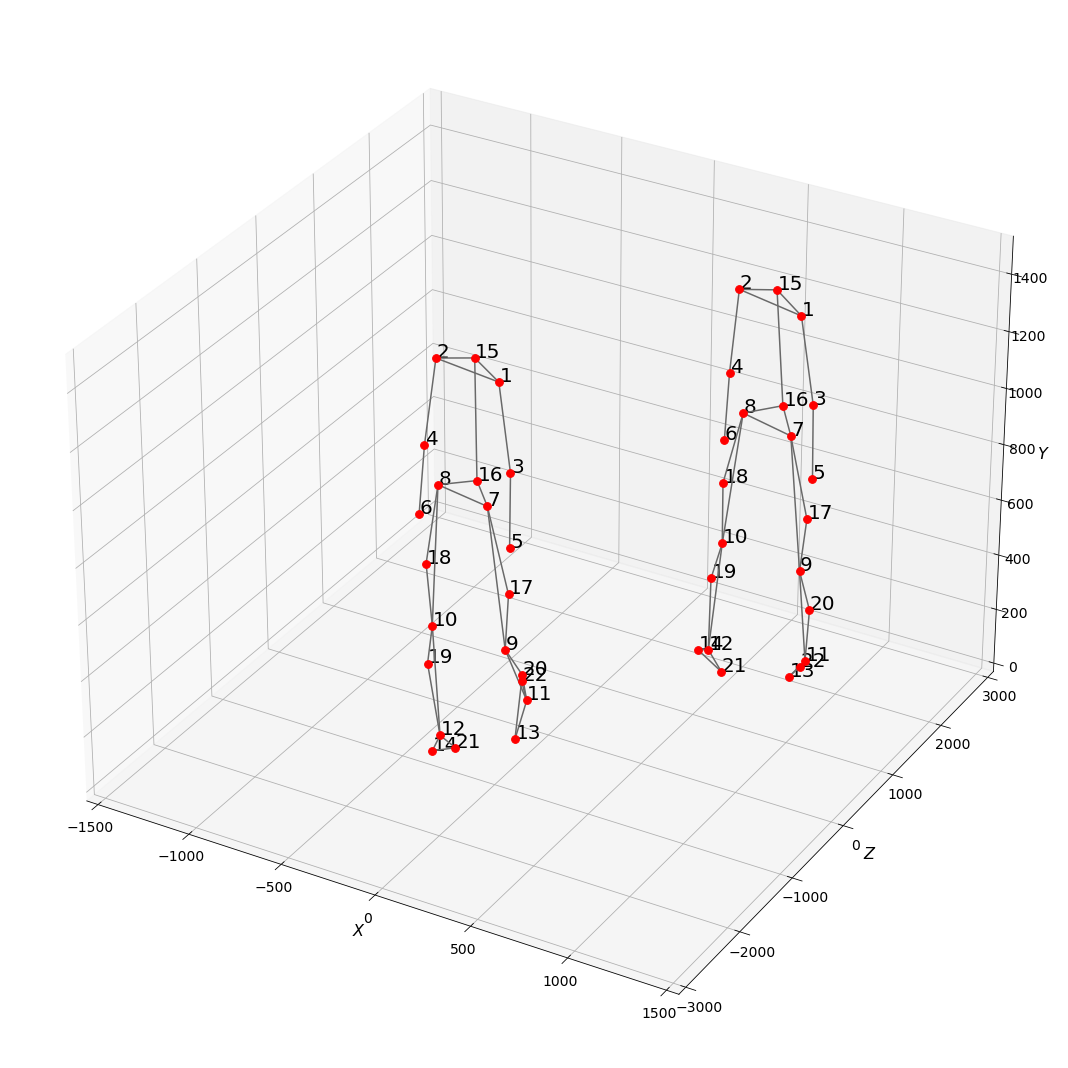

In [22]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')

ax.set_zlim3d(0, 1500) # Altura
ax.set_xlim3d(-1500, 1500)
ax.set_ylim3d(-3000, 3000)
ax.set_zlabel('$Y$', rotation = 0)
ax.set_xlabel('$X$', rotation = 0)
ax.set_ylabel('$Z$', rotation = 0)

frame1 = 141
makers_points1 = plot_points(ax, frame1)
connect_points(ax, makers_points1)
    
frame2 = 440
makers_points2 = plot_points(ax, frame2)
connect_points(ax, makers_points2)
    
save_fig("markers2", "./", tight_layout=True, fig_extension="pdf")
plt.show()

A partir de estas gráficas de dispersión se deducen algunos aspectos relevantes relacionados
con el sistema de referencia utilizado por la herramienta de captura. Tal y como se puede
observar en las representaciones,  el centro de coordenadas (0,0,0) se ubica
en el punto central de la zona de captura, y se corresponde con el lugar exacto donde se
colocó la barra de marcadores durante el proceso de calibración. De esta forma, la posición
espacial de cada marcador en un instante de la grabación viene dada por la distancia, en
las tres dimensiones, a ese punto de calibración, medida en milímetros. Asimismo, se ha
comprobado que los ejes X,Y,Z indican, respectivamente, el ancho (desplazamiento lateral),
alto y dirección de progresión. Es fundamental conocer esta información para trabajar con
este tipo de datos en las fases posteriores del proyecto.

## Datos biomecánicos

### Carga de datos

In [23]:
cdg = pd.read_csv(dataset_path + "/" + subject + "/" + record + "/biomechanics/COG_angles.csv", sep=";", decimal=",")
cdg

,Tiempo,CDG X,CDG Y,CDG Z
0,0.00,60.78877,88.95882,205.95230
1,0.01,60.80220,88.96023,205.93053
2,0.02,60.80463,88.96417,205.91052
3,0.03,60.81589,88.97406,205.87442
4,0.04,60.83459,88.97408,205.84155
...,...,...,...,...
2995,29.95,-55.10443,88.81896,-184.11760
2996,29.96,-55.34288,88.76812,-184.52007
2997,29.97,-55.65051,88.74087,-184.96283
2998,29.98,-55.96173,88.69009,-185.40488


In [24]:
events_table = pd.read_csv(dataset_path  + "/" + subject + "/" + record + "/" + subject + "_" + record 
                           + ".events.TXT", sep="\t", header=None, names=["index", "event", "time"])
events = [tuple(x) for x in events_table.values]
events_table

,index,event,time
0,0,EVENT_LEFT_FOOT_TOE_OFF,0.98
1,1,EVENT_LEFT_FOOT_INITIAL_CONTACT,1.41
2,2,EVENT_RIGHT_FOOT_TOE_OFF,1.69
3,3,EVENT_RIGHT_FOOT_INITIAL_CONTACT,2.26
4,4,EVENT_LEFT_FOOT_TOE_OFF,2.42
...,...,...,...
79,79,EVENT_LEFT_FOOT_TOE_OFF,28.25
80,80,EVENT_LEFT_FOOT_INITIAL_CONTACT,28.77
81,81,EVENT_RIGHT_FOOT_TOE_OFF,28.90
82,82,EVENT_RIGHT_FOOT_INITIAL_CONTACT,29.40


#### Desplazamiento lateral

In [25]:
time = cdg["Tiempo"].to_numpy()
cdg_y = cdg["CDG Y"].to_numpy()

Saving figure cdg_vertical


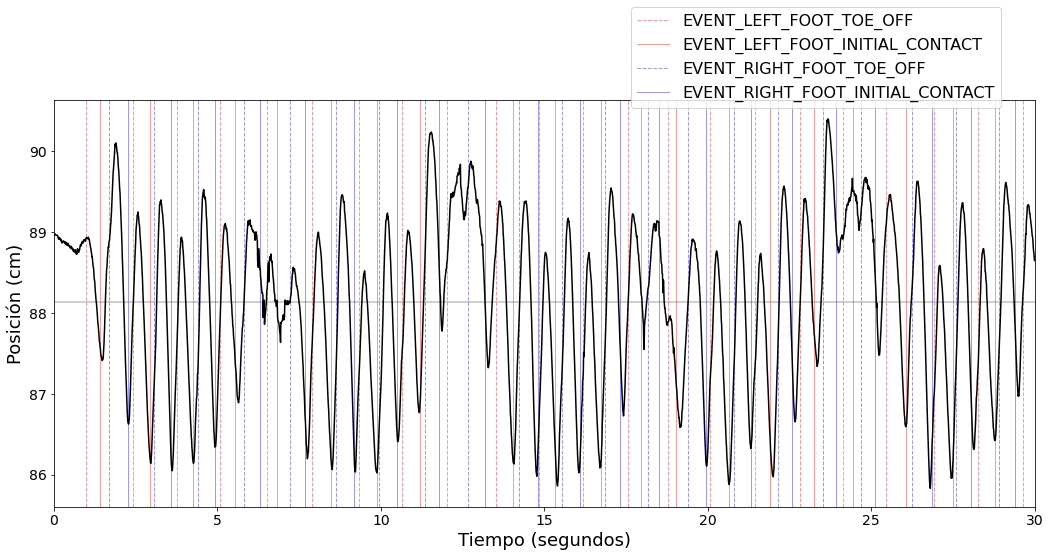

In [26]:
plt.figure(figsize=(15,8))

plt.axhline(y=cdg_y.mean(), color='silver', linestyle='-')
labels = []
for event in events:
    color = "red" if "LEFT" in event[1] else "blue"
    linestyle = "solid" if "INITIAL_CONTACT" in event[1] else "dashed"
    if not event[1] in labels:
        plt.axvline(x=event[2], c=color, alpha=0.4, label = event[1], ls=linestyle, linewidth=1)
        labels.append(event[1])
    else:
        plt.axvline(x=event[2], c=color, alpha=0.4, ls=linestyle, linewidth=1)

plt.xlim(0,30)
plt.plot(time, cdg_y, c="black")
plt.ylabel('Posición (cm)', fontsize=18)
plt.xlabel('Tiempo (segundos)', fontsize=18)



plt.legend(loc='upper left', bbox_to_anchor=(0.58, 1.25), prop={'size': 16})

save_fig('cdg_vertical', './', fig_extension="pdf")
plt.show()

## Curvas cinemáticas

### Carga de datos

In [27]:
def load_kinematics(subject_id, record_id):
    kinematics_path = dataset_path + "/" + subject_id + "/" + record_id + "/"+ "strides/"
    kinematics = {}
    
    # ------- Pelvis -------
    # Sagittal Plane - Tilt
    kinematics['right_pelvis_tilt'] = pd.read_csv(kinematics_path + "Pelvic_Tilt_Left.csv", header=None)
    kinematics['left_pelvis_tilt'] = pd.read_csv(kinematics_path + "Pelvic_Tilt_Right.csv", header=None)
    
    # Coronal Plane - Obliquity
    kinematics['right_pelvis_obliquity'] = pd.read_csv(kinematics_path + "Pelvic_Obliquity_Right.csv", header=None)
    kinematics['left_pelvis_obliquity'] = pd.read_csv(kinematics_path + "Pelvic_Obliquity_Left.csv", header=None)
    
    # Transversal Plane - Rotation
    kinematics['right_pelvis_rotation'] = pd.read_csv(kinematics_path + "Pelvic_Rotation_Right.csv", header=None)
    kinematics['left_pelvis_rotation'] = pd.read_csv(kinematics_path + "Pelvic_Rotation_Left.csv", header=None)

    # ------- Hip -------
    # Sagittal Plane - Flexion [+]/Extension [-]
    kinematics['right_hip_flex_ext'] = pd.read_csv(kinematics_path + "Hip_FlexExt_Right.csv", header=None)
    kinematics['left_hip_flex_ext'] = pd.read_csv(kinematics_path + "Hip_FlexExt_Left.csv", header=None)
    
    # Coronal Plane - Adduction [+]/Abduction [-]
    kinematics['right_hip_add_abd'] = pd.read_csv(kinematics_path + "Hip_AbdAdd_Right.csv", header=None) 
    kinematics['left_hip_add_abd'] = pd.read_csv(kinematics_path + "Hip_AbdAdd_Left.csv", header=None)

    # Transversal Plane - Rotation Internal [+] /External [-]
    kinematics['right_hip_rotation'] = pd.read_csv(kinematics_path + "Hip_Rotation_Right.csv", header=None)
    kinematics['left_hip_rotation'] = pd.read_csv(kinematics_path + "Hip_Rotation_Left.csv", header=None)
    
    # ------- Knee -------
    # Sagittal Plane - Flexion [+]/Extension [-]
    kinematics['right_knee_flex_ext'] = pd.read_csv(kinematics_path + "Knee_FlexExt_Right.csv", header=None)
    kinematics['left_knee_flex_ext'] = pd.read_csv(kinematics_path + "Knee_FlexExt_Left.csv", header=None)

    # Coronal Plane - Valgus [+]/ Varus [-]
    kinematics['right_knee_val_var'] = pd.read_csv(kinematics_path + "Knee_AbdAdd_Right.csv", header=None)
    kinematics['left_knee_val_var'] = pd.read_csv(kinematics_path + "Knee_AbdAdd_Left.csv", header=None)

    # Transversal Plane - Rotation Internal [+] /External [-]
    kinematics['right_knee_rotation'] =pd.read_csv(kinematics_path + "Knee_Rotation_Right.csv", header=None)
    kinematics['left_knee_rotation'] = pd.read_csv(kinematics_path + "Knee_Rotation_Left.csv", header=None)
    
    # ------- Ankle -------
    # Sagittal Plane - Flexion [+]/Extension [-]
    kinematics['right_ankle_flex_ext'] =pd.read_csv(kinematics_path + "Ankle_FlexExt_Right.csv", header=None)
    kinematics['left_ankle_flex_ext'] = pd.read_csv(kinematics_path + "Ankle_FlexExt_Left.csv", header=None)

    # Coronal Plane - Adduction [+]/Abduction [-]
    kinematics['right_ankle_add_abd'] = pd.read_csv(kinematics_path + "Ankle_AbdAdd_Right.csv", header=None)
    kinematics['left_ankle_add_abd'] = pd.read_csv(kinematics_path + "Ankle_AbdAdd_Left.csv", header=None)
    
    # Transversal Plane - Rotation Internal [+] /External [-]
    kinematics['right_ankle_rotation'] = pd.read_csv(kinematics_path + "Ankle_Rotation_Right.csv", header=None)
    kinematics['left_ankle_rotation'] = pd.read_csv(kinematics_path + "Ankle_Rotation_Left.csv", header=None)
    
    # ------- Foot -------
    #Transversal Plane - Rotation Internal [+] /External [-]
    kinematics['right_foot_rotation'] = pd.read_csv(kinematics_path + "Foot_Rotation_Right.csv", header=None)
    kinematics['left_foot_rotation'] = pd.read_csv(kinematics_path + "Foot_Rotation_Left.csv", header=None)
    
    return kinematics

In [28]:
kinematics = load_kinematics(subject, record)

In [29]:
left_color = "tab:red" # 214. 39. 40. (RGB)    #d62727
right_color = "tab:blue" # 21. 119. 180. (RGB) #1577b4

def standard_plot(kinematic_name, title, xlabel="Ciclo (%)", y_label = "Ángulo (º)"):
    sd_opacity = 0.15
    gc_opacity = 0.035
    
    plt.axhline(color='black', linewidth = 0.25)
    plt.axvspan(0, 60, ymin=0.0, ymax=1, alpha= gc_opacity, color='black')
    
    # Prepare data
    left_mean = kinematics["left_" + kinematic_name].values
    right_mean = kinematics["right_" + kinematic_name].values
    
    # Plot data
    graph = plt.plot(left_mean, left_color, right_mean, right_color)
    
    # Set title and labels
    plt.title(title, fontsize=BIGGER_SIZE)
    plt.xlabel(xlabel, )
    plt.ylabel(y_label,)
    plt.xticks(np.arange(0, 101, step=20))
    plt.autoscale(enable=True, axis= 'both', tight = True)
    plt.margins(y = .1)
    
    return graph

Saving figure kinematics_resume_image


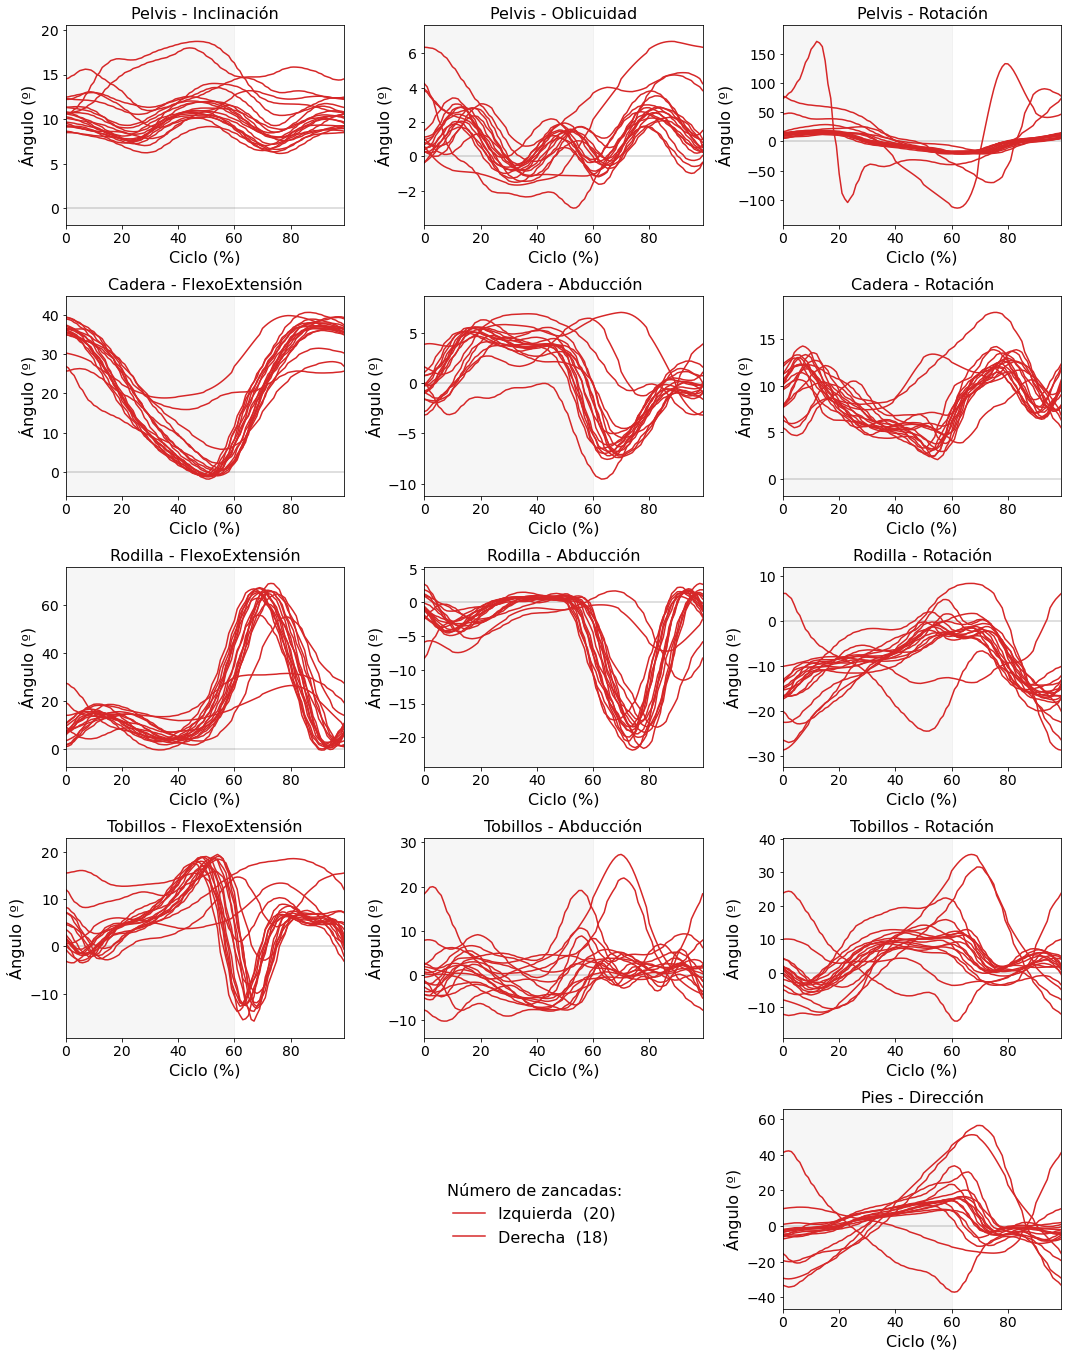

In [30]:
fig = plt.figure(figsize=(15,19))
fig.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.2)

strides_left = kinematics["left_pelvis_tilt"].columns.size
strides_right = kinematics["right_pelvis_tilt"].columns.size

# Pelvis - Inclinación
plt.subplot(5, 3, 1)  # Layout 4 rows, 3 columns, position 1 - top left
standard_plot('pelvis_tilt', "Pelvis - Inclinación")

# Pelvis - Oblicuidad
plt.subplot(5, 3, 2)
standard_plot('pelvis_obliquity', "Pelvis - Oblicuidad")

# Pelvis - Rotación
plt.subplot(5, 3, 3)
standard_plot('pelvis_rotation', "Pelvis - Rotación")

# Caderas - FlexoExtensión
plt.subplot(5, 3, 4)
standard_plot('hip_flex_ext', "Cadera - FlexoExtensión")

# Caderas - Abducción
plt.subplot(5, 3, 5)
standard_plot('hip_add_abd', "Cadera - Abducción")

# Caderas - Rotación
plt.subplot(5, 3, 6)
standard_plot('hip_rotation', "Cadera - Rotación")

# Rodillas - FlexoExtensión
plt.subplot(5, 3, 7)
standard_plot('knee_flex_ext', "Rodilla - FlexoExtensión")

# Rodillas - Abducción
plt.subplot(5, 3, 8)
standard_plot('knee_val_var', "Rodilla - Abducción")

# Rodillas - Rotación
plt.subplot(5, 3, 9)
standard_plot('knee_rotation', "Rodilla - Rotación")

# Tobillos - FlexoExtensión
plt.subplot(5, 3, 10)
standard_plot('ankle_flex_ext', "Tobillos - FlexoExtensión")

# Tobillos - Abducción
plt.subplot(5, 3, 11)
standard_plot('ankle_add_abd', "Tobillos - Abducción")

# Tobillos - Rotación
plt.subplot(5, 3, 12)
standard_plot('ankle_rotation', "Tobillos - Rotación")

# Pies - Dirección
plt.subplot(5, 3, 15)
label = standard_plot('foot_rotation', "Pies - Dirección")


plt.subplots_adjust(left=.075, bottom = .085, right=.925, top=.915, wspace=0.5, hspace=0.5)
plt.figlegend((label[::len(label)-1]),('Izquierda  ' + '(' + str(strides_left) + ')', 
               'Derecha  ' + '(' + str(strides_right) + ')'), title="Número de zancadas:", 
              loc='lower center', bbox_to_anchor=(0.5, 0.075),  
              frameon = False, ncol=1, fancybox=True, shadow=False, fontsize=16, title_fontsize=16)

save_fig('kinematics_resume_image', './', fig_extension="pdf")
plt.show()